In [1]:
import pandas as pd
import pdfplumber

In [1]:
!pip install pandasai

  Using cached pandas-1.5.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
You should consider upgrading via the '/home/contalbo/Uni/code/table_processing/env/bin/python3 -m pip install --upgrade pip' command.


# PandasAI

In [3]:
import os

os.environ['PANDASAI_API_KEY'] = ""

In [40]:
import os
from pandasai import SmartDatalake
from pandasai.llm import BambooLLM, OpenAI

path = "./results/pdfplumber/Ascopiave_Relazione_finanziaria_annuale_al_31_dicembre_2022"
datalake_list = []
for filename in os.listdir(path)[2:3]:
    if not filename.endswith(".csv"):
        continue
    
    df = pd.read_csv(os.path.join(path, filename))

    datalake_list.append(df)

#llm = BambooLLM(api_key="$2a$10$3kKSoa5oe7oQR/wdAUWd5.9QVhWL1yaGeDnPxI.WBFWsKrFtRjxhi")
llm = OpenAI(model="gpt-3.5-turbo", temperature=0.01, api_token="")

lake = SmartDatalake(datalake_list, config={"llm": llm})

In [41]:
datalake_list[0].head()

,0,1,2
0,(Migliaia di Euro),31 dicembre 2022,31 dicembre 2021
1,Patronage su linee di credito,6.307,6.307
2,Su esecuzione lavori\nSu concessione distribuz...,6.710\n6.206\n4.832\n13\n912\n120\n0\n106,1.776\n6.468\n500\n0\n0\n0\n75\n0
3,Su impianti di produzione energia rinnovabile,6.168,0
4,Totale,31.374,15.127


In [42]:
lake.chat("Qual è il valore totale nella seconda colonna?")

6.307

In [9]:
!pip install pandas==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 18.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandasai 2.2.10 requires pandas==1.5.3, but you have pandas 1.4.2 which is incompatible.
You should consider upgrading via the '/home/contalbo/Uni/code/table_processing/env/bin/python3 -m pip install --upgrade pip' command.


In [2]:
!pip install pandasai
!pip install pandas

You should consider upgrading via the '/home/contalbo/Uni/code/table_processing/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/contalbo/Uni/code/table_processing/env/bin/python3 -m pip install --upgrade pip' command.


In [41]:
employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)

lake = SmartDatalake([employees_df, salaries_df])
lake.chat("What's the name of the employee that gets paid the most?")

Traceback (most recent call last):
  File "/home/contalbo/Uni/code/table_processing/env/lib/python3.9/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 333, in run
    output = (
  File "/home/contalbo/Uni/code/table_processing/env/lib/python3.9/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/contalbo/Uni/code/table_processing/env/lib/python3.9/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/home/contalbo/Uni/code/table_processing/env/lib/python3.9/site-packages/pandasai/pipelines/chat/prompt_generation.py", line 37, in execute
    self.logger.log(f"Using prompt: {prompt}")
  File "/home/contalbo/Uni/code/table_processing/env/lib/python3.9/site-packages/pandasai/prompts/base.py", line 55, in __str__
    return self.to_string()
  File "/home/contalbo/Uni/code/table_processing/env/lib/python3.9/site-packages/pandasai/prompts/base.py", line 50, in to_string
    self._re

"Unfortunately, I was not able to answer your question, because of the following error:\n\n'Index' object has no attribute '_format_native_types'\n"

# Extraction with Pdfplumber

In [113]:
pdf = pdfplumber.open("pdfs/ADR_RAI_2022_ITA.pdf")

In [114]:
p0 = pdf.pages[23]

In [133]:
import pdfplumber
import fitz  # PyMuPDF
from PIL import Image


def extract_high_quality_region(pdf_path, page_number, bbox, image_path, dpi=300):
    """
    Extracts a region from a PDF page and saves it as a high-quality image.

    :param pdf_path: Path to the PDF file
    :param page_number: Page number to extract from (0-based index)
    :param bbox: Tuple (x0, y0, x1, y1) representing the bounding box of the region to extract
    :param image_path: Path to save the extracted image
    :param dpi: DPI for the output image
    """
    # Open the PDF file using PyMuPDF
    document = fitz.open(pdf_path)
    
    # Select the specified page
    page = document.load_page(page_number)
    
    # Define the rectangular area to extract
    rect = fitz.Rect(bbox)
    
    # Set zoom factor based on DPI
    zoom = dpi / 72  # 72 is the default resolution in PyMuPDF
    mat = fitz.Matrix(zoom, zoom)
    
    # Extract the image from the specified region
    pix = page.get_pixmap(matrix=mat, clip=rect)
    
    # Save the image using Pillow
    image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    image.save(image_path, "PNG")

In [134]:
bbox = list(p0.find_tables()[0].bbox)
bbox[1] -= 50
bbox[0] -= 5
bbox[2] += 5
bbox[3] += 5
new_p0 = p0.crop(tuple(bbox))

In [135]:
pdf_path = "pdfs/ADR_RAI_2022_ITA.pdf"
page_number = 23
new_path = "prova_highquality.png"

extract_high_quality_region(pdf_path, page_number, bbox, new_path)

In [123]:
bbox = [0,0,0,0] #list(new_p0.find_tables()[0].bbox)
bbox[0] = new_p0.curves[0]["x0"]
bbox[1] = new_p0.curves[0]["top"]
bbox[2] = new_p0.curves[0]["x1"]
bbox[3] = new_p0.curves[0]["bottom"]
new_new_p0 = new_p0.crop(tuple(bbox))

In [126]:
extract_high_quality_region(pdf_path, page_number, bbox, new_path)

In [ ]:
!pip install img2table

In [62]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

[sudo] password for contalbo: 
[sudo] password for contalbo: 

In [58]:
!pip install pytesseract
!pip install tesseract
!pip install tesseract-ocr

You should consider upgrading via the '/home/contalbo/Uni/code/table_processing/env/bin/python3 -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 5.7 MB/s eta 0:00:0000:01m00:01
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562550 sha256=69300cd8a459270eb7a75518d290aa3e50fd0e2fb2edf8599b44018f7d606233
  Stored in directory: /home/contalbo/.cache/pip/wheels/6c/c5/81/8310cc52076953e53412ed1875a5e224c92940235bdcee21a2
Successfully built tesseract
You should consider upgrading via the '/home/contalbo/Uni/code/table_processing/env/bin/python3 -m pip install --upgrade pip' command.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 5.5 MB/s eta 0:00:0000:0100:01
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [30 lines of output]
      /home/contalbo/U

In [9]:
from img2table.ocr import EasyOCR

ocr = EasyOCR(lang=["en"])

/home/contalbo/Uni/code/table_processing/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [162]:
from img2table.ocr import TesseractOCR
from img2table.document import Image

ocr = TesseractOCR(n_threads=1, 
                   lang="ita", 
                   psm=6)

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [163]:
doc = Image("prova_highquality.png")

# Table extraction
extracted_tables = doc.extract_tables(ocr=ocr,
                                      implicit_rows=False,
                                      borderless_tables=True,
                                      min_confidence=50)

/home/contalbo/Uni/code/table_processing/env/lib/python3.9/site-packages/img2table/tables/processing/bordered_tables/cells/identification.py:17: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_h_lines.columns})
/home/contalbo/Uni/code/table_processing/env/lib/python3.9/site-packages/img2table/tables/processing/bordered_tables/cells/deduplication.py:21: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  .rename({col: f"{col}_" for col in df_cells.columns})


In [164]:
len(extracted_tables)

2

In [166]:
extracted_tables[1].content

OrderedDict([(0,
              [TableCell(bbox=BBox(x1=33, y1=1257, x2=421, y2=1300), value=None),
               TableCell(bbox=BBox(x1=421, y1=1257, x2=1017, y2=1300), value=None),
               TableCell(bbox=BBox(x1=1017, y1=1257, x2=1610, y2=1300), value='Danni reputazionali, svalutazione degli'),
               TableCell(bbox=BBox(x1=1610, y1=1257, x2=2161, y2=1331), value='4+), mantenimento dello stato Carbon\nfino al 2030')]),
             (1,
              [TableCell(bbox=BBox(x1=33, y1=1300, x2=421, y2=1331), value='ESG'),
               TableCell(bbox=BBox(x1=421, y1=1300, x2=1017, y2=1331), value='Rischi connessi al cambiamento'),
               TableCell(bbox=BBox(x1=1017, y1=1300, x2=1610, y2=1331), value='asset e minore redditività nonché man-'),
               TableCell(bbox=BBox(x1=1610, y1=1257, x2=2161, y2=1331), value='4+), mantenimento dello stato Carbon\nfino al 2030')]),
             (2,
              [TableCell(bbox=BBox(x1=33, y1=1331, x2=421, y2=1430), value=

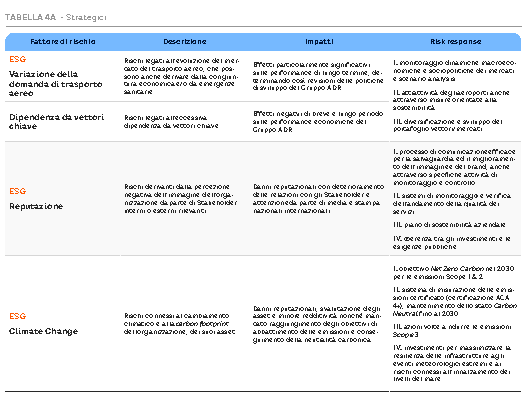

In [12]:
bbox = list(p0.find_tables()[0].bbox)
bbox[1] -= 50
bbox[0] -= 5
bbox[2] += 5
bbox[3] += 5
p0.crop(tuple(bbox)).to_image().original

In [4]:
for k,v in p0.curves[0].items():
    print(f"{k}: {v}")

x0: 605.1968
y0: 808.7242
x1: 794.5238
y1: 841.8192
width: 189.327
height: 33.09500000000003
pts: [(605.1968, 30.816799999999944), (610.5598000000001, 30.816799999999944), (625.9318000000001, 15.443799999999896), (641.3048, 0.07079999999996289), (757.6998000000001, 0.07079999999996289), (773.0728, 15.443799999999896), (788.4458000000001, 30.816799999999944), (794.5238, 30.816799999999944), (781.7378000000001, 33.16579999999999), (615.9688000000001, 33.16579999999999), (605.1968, 30.816799999999944)]
linewidth: 0
stroke: False
fill: True
evenodd: False
stroking_color: None
non_stroking_color: (1, 1, 1)
mcid: None
tag: None
object_type: curve
page_number: 42
stroking_pattern: None
non_stroking_pattern: None
path: [('m', (605.1968, 30.816799999999944)), ('l', (610.5598000000001, 30.816799999999944)), ('c', (619.0498, 30.816799999999944), (625.9318000000001, 23.933799999999906), (625.9318000000001, 15.443799999999896)), ('c', (625.9318000000001, 6.953799999999887), (632.8148000000001, 0.07

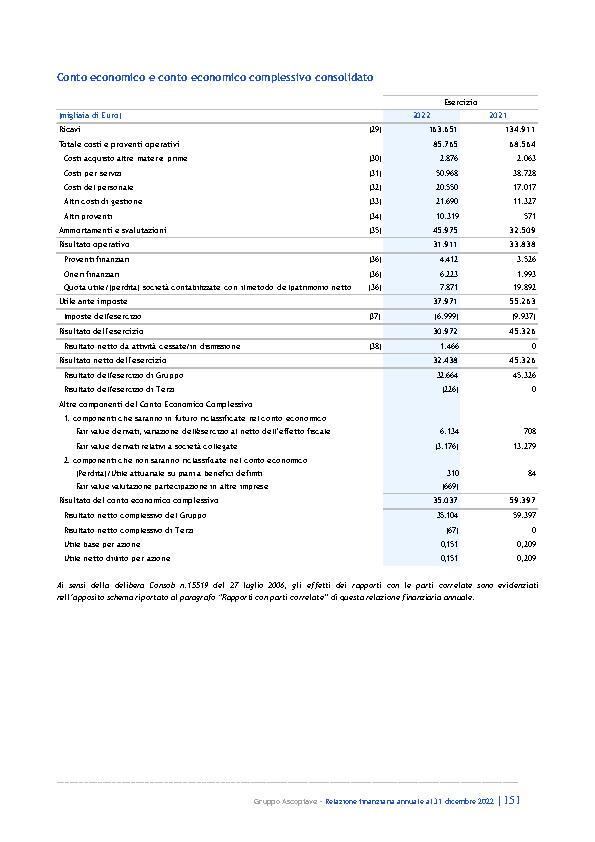

In [49]:
im = p0.to_image()
im

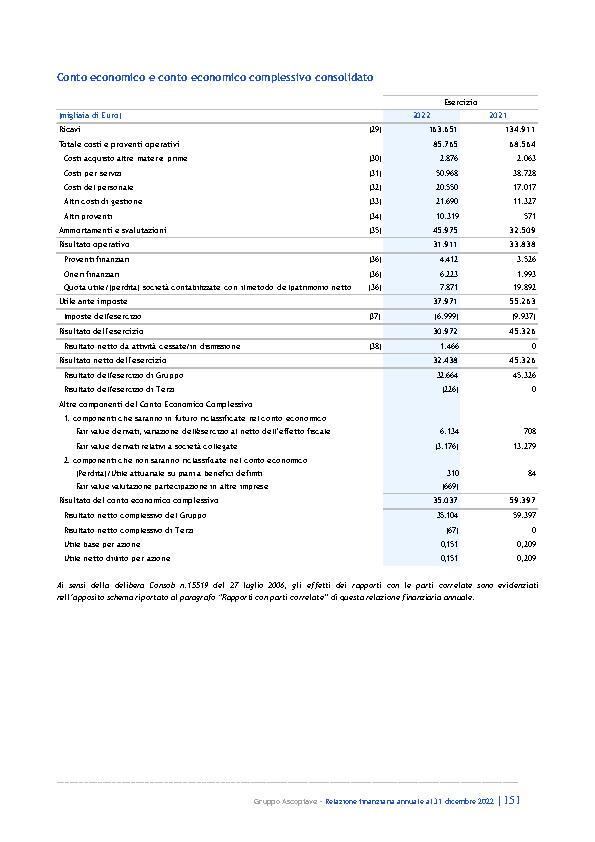

In [50]:
im.draw_lines(p0.curves, stroke="red", stroke_width=1)

In [46]:
table = p0.extract_tables()

In [47]:
table[0].bbox

AttributeError: 'list' object has no attribute 'bbox'

In [48]:
df = pd.DataFrame(table[0])
df.head()

,0,1,2
0,Esercizio,None,None
1,(migliaia di Euro),2022,2021
2,Ricavi (29)\nTotale costi e proventi operativi...,163.651\n85.765\n2.876\n50.968\n20.550\n21.690...,134.911\n68.564\n2.063\n38.728\n17.017\n11.327...
3,Risultato operativo,31.911,33.838
4,Proventi finanziari (36)\nOneri finanziari (36...,4.412\n6.223\n7.871,3.526\n1.993\n19.892


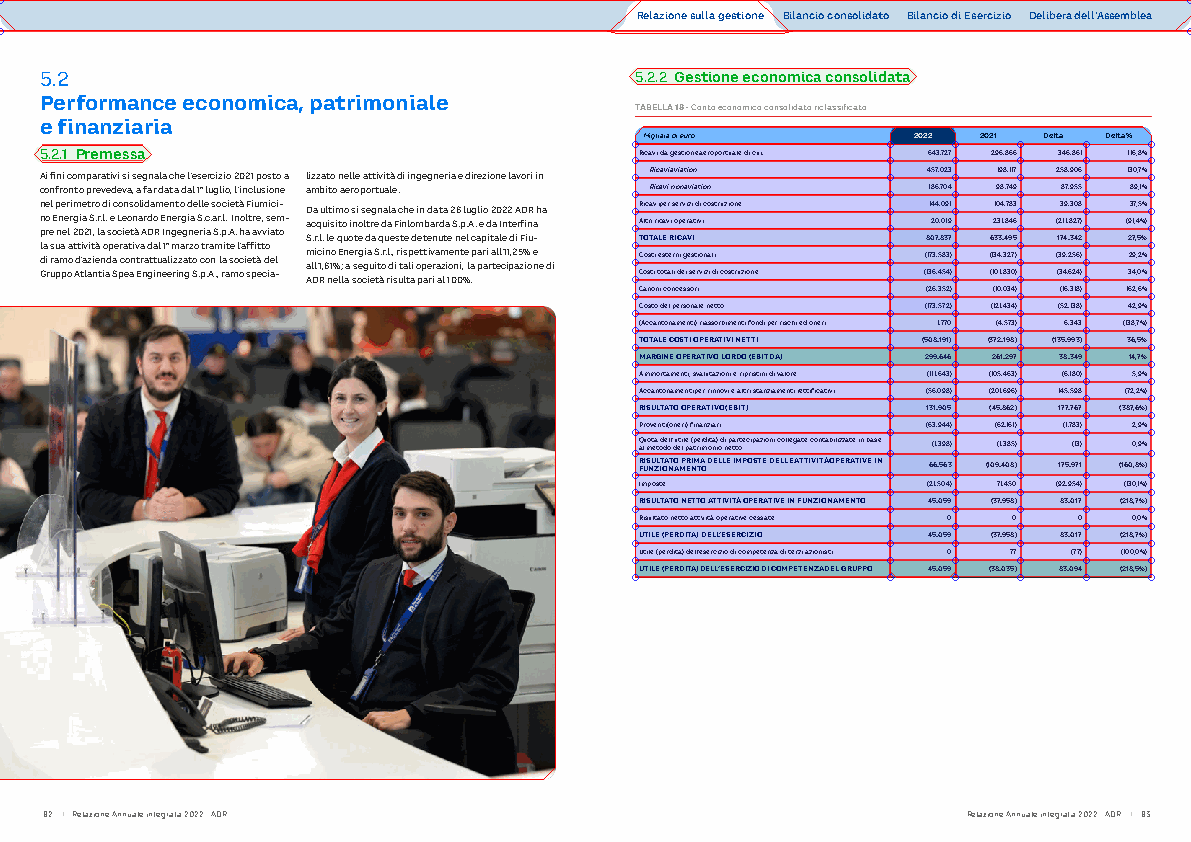

In [11]:
im.debug_tablefinder()